In [1]:
%pylab inline
import glob

Populating the interactive namespace from numpy and matplotlib


In [2]:
def readVoltagesCurrents_Channel(filename, channel):
    lines = tuple(open(filename, 'r'))
    counter=0
    columnStarter=3+2*channel
    voltages=empty((0))
    voltageMesured=""
    currents=empty((0))
    currentMesured=""
    times=empty((0))
    for line in lines:
        if(line!='\n' or line!='\r' or line!=''):         
            line = line.replace('\n', '')
            strings=line.split(";")
            if(strings[columnStarter].startswith( 'Vmeasure' )):
                voltageMesured=strings[columnStarter]
                currentMesured=strings[columnStarter+1]
            else:
                voltages=append(voltages, float(strings[columnStarter].replace(',','')))
                currents=append(currents,float(strings[columnStarter+1]))
                time=strings[1].split(":")
                times=append(times, float(time[0])*3600.0+float(time[1])*60.0+float(time[2]))
                counter+=1
    #Getting the time (ms) from the start of the mesurement
    firstTime=times[0]
    timesFromStart=times-firstTime
    #The current in microamps
    microcurrents=currents*1000000
    return voltages,microcurrents,timesFromStart

In [3]:
def readVoltagesCurrentsTimes_All(filename):
    my_file=open(filename)
    num_lines = sum(1 for line in my_file) -2 #because of 2 extra lines
    if(num_lines>3000):
        num_lines=num_lines+1
    if(my_file.readline()!=''):
        num_lines=num_lines+1
    voltages=zeros((8,num_lines))
    microcurrents=zeros((8,num_lines))
    for channel in range (8):
        voltages[channel],microcurrents[channel],times=readVoltagesCurrents_Channel(filename, channel)
    return voltages,microcurrents,times

Now the idea is to plot the Voltage and the Current

TypeError: There is no line property "fontsize"

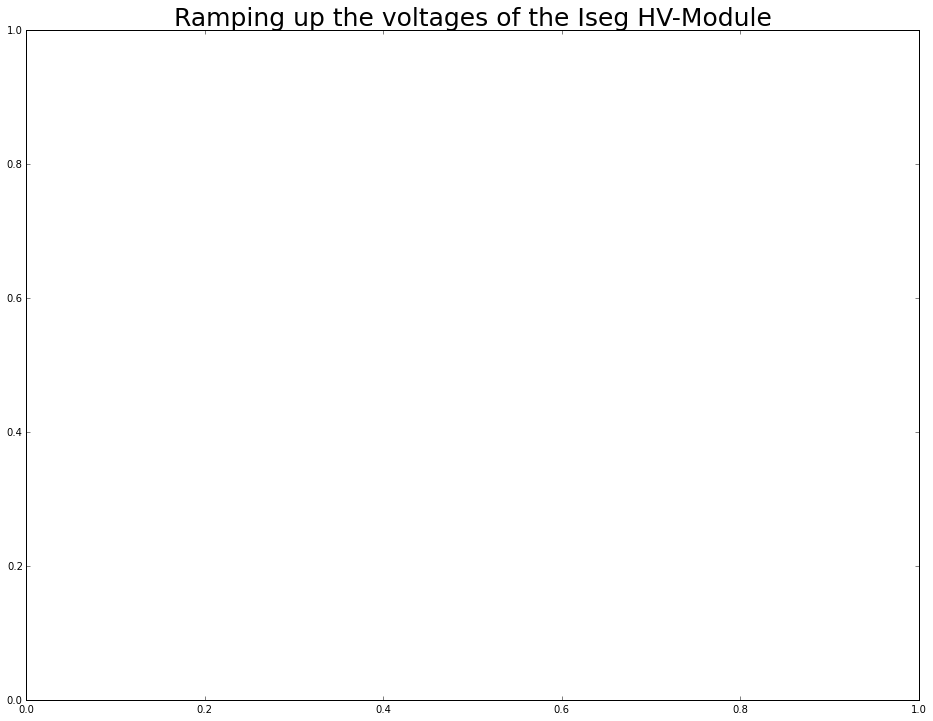

In [9]:
#For everychannel. It's not efficient but it doesn't matter here.
fileset = glob.glob('*.csv')
counter=0
for nfile in fileset:
    voltages, microcurrents,times=readVoltagesCurrentsTimes_All(nfile)
    figure(num=counter, figsize=(16, 12), dpi=160, facecolor='w', edgecolor='k')
    #title("Voltages of file: "+nfile)
    title("Ramping up the voltages of the Iseg HV-Module", fontsize=25)
    for i in range(8):
        if(i%2==0):   
            plot(times,voltages[i], label='Channel '+str(i),0)
            xlabel("time(s)", fontsize=20)
            ylabel("Voltage (V)", fontsize=20)
    legend()
    counter+=1
    figure(num=counter, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    title("Currents of file: "+nfile)
    for i in range(8):
        if(i%2==0):   
            plot(times,microcurrents[i], label='Channel '+str(i))
            xlabel("time(s)")
            ylabel("Current ( micro A )")
    legend()
    counter+=1

In [15]:
import pandas as pd
df=pd.read_csv('06_24_2015.csv', sep=';',header=None)

In [48]:
floatsito=float(df[5][1])

0.187974


[             nan              nan   7.20510000e+05   2.02265000e-01
   2.53476000e-09   1.87974000e-01   3.38052000e-09   1.60025000e-01
   3.20929000e-09   1.79570000e-01   3.98419000e-09   1.81037000e-01
   4.28634000e-09   4.80033000e-02   3.27780000e-09   1.81560000e-01
   2.93140000e-09   2.27846000e-01   3.99514000e-09   3.00000000e+01]
